# Setting up and running analysis on batch runs

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install mesa
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib

In [140]:
import pandas as pd
import matplotlib as plt
#wolf_batch = pd.read_csv('./seg_model_batch_run_data.csv', index_col=None)
batch_long = pd.read_csv('./seg_model_steps_batch_run_data_long.csv', index_col=None)

### Get a sense of what's happening with your data by doing some digging around:

In [3]:
# take a peek at the overall structure
batch_long.head()

,Run Num,Grass Regrowth,Sheep Gain,Wolf Gain,Animal,Step Num,Count
0,0,25,2,18,Wolves,0,50
1,0,25,2,18,Sheep,0,100
2,0,25,2,18,Grass,0,214
3,1,25,2,18,Wolves,0,50
4,1,25,2,18,Sheep,0,100


### Some thinking about how to work with this and move forward:
We're interested in the relationship between wolves, sheep, and grass. We did a batch run to generate the CSV data (above) that varied the following parameters:

                params = {"grass_regrowth_time": [*range(25,37,5)], 
                        "sheep_gain_from_food": [*range(2,6,1)],
                        "wolf_gain_from_food": [*range(18,28,2)]
                        }

What we will likely want to look at is how these elements come together. We could replicate the plot from a single run, but I don't know how much that will help us progress on answering our question. Instead, we will want to think about creating separate universes where we focus on the variation of one element and how that impacts our findings. 

### Fun with plots
We want to think about how to best convey our data -- we can think about conveying what we observe overall and then breaking it out by our variables. We can do this based on the different parameters we vary. However, we do want to be mindful that this might just look like a lot of graphs. So, we want to be clear in our labels and to provide context whenever possible. For this setup, the context I'm providing is overall averages and relative averages. 

In [ ]:

batch_long

In [5]:
# first step is to create some averages for our data: overall and then by the various parameters we swept.

# overall averages: (you could go all-out here, but I tried to keep it somewhat simple)
batch_avgs = batch_long.groupby(['Animal', "Step Num"], as_index=False).agg(Total_Avg=('Count', 'mean')).round(1) 
batch_avgs_grass = batch_long.groupby(['Animal', "Grass Regrowth", "Step Num"], as_index=False).agg(Total_Avg_Grass=('Count', 'mean')).round(1)
batch_avgs_wolf = batch_long.groupby(['Animal', "Wolf Gain", "Step Num"], as_index=False).agg(Total_Avg_Wolf_Gain=('Count', 'mean')).round(1)
batch_avgs_sheep = batch_long.groupby(['Animal', "Sheep Gain", "Step Num"], as_index=False).agg(Total_Avg_Sheep_Gain=('Count', 'mean')).round(1) 
batch_avgs_sweep = batch_long.groupby(['Animal', "Grass Regrowth", "Wolf Gain", "Sheep Gain", "Step Num"], as_index=False).agg(Total_Avg_Grass_Wolf_Sheep_Gain=('Count', 'mean')).round(1) 




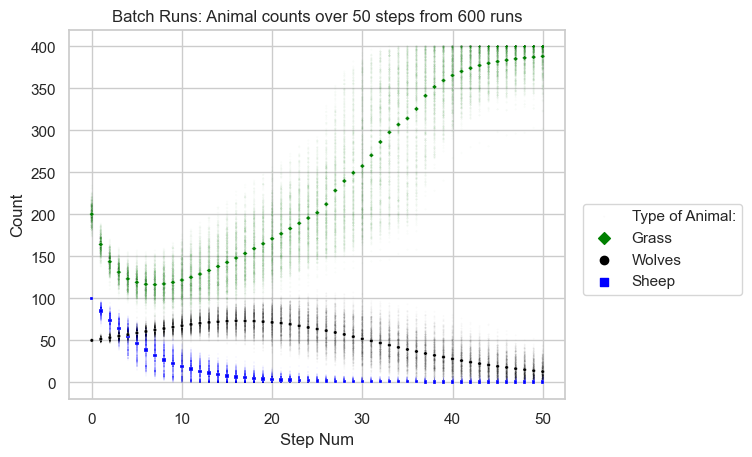

In [102]:
# Scatterplot party!
import seaborn as sns
import matplotlib as plt 
sns.set_theme(style="whitegrid")



# Do an overall plot to see how things look: 
# Note that the transparency and size are low here -- just want a general sense of the data
full_data = sns.scatterplot(x="Step Num", y="Count", hue="Animal",  
                palette=["green", "black", "blue"], style= "Animal", 
                s= 2, hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Grass": "D", "Wolves": "o", "Sheep": "s" }, 
                alpha = 0.02,
             data=batch_long).set(title='Batch Runs: Animal counts over 50 steps from 600 runs')


# Also add in averages for overall
# Note that here we have a larger point size and no transparency
# Need to fix the legend XXX
avg_data = sns.scatterplot(x="Step Num", y="Total_Avg", hue="Animal",  
                palette=["green", "black", "blue"], style= "Animal", 
                s= 6, hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Grass": "D", "Wolves": "o", "Sheep": "s" }, 
             data=batch_avgs).legend(labels=["Type of Animal:","Grass", "Wolves", "Sheep"], 
                                     bbox_to_anchor=(1.02, 0.55)) #note, you can move around as you'd like
             


In [7]:
## Create one big beautiful dataset. (probably better ways to do this efficiently)
# do it this way so you can do some nice facet plots below
# note: I did some checks on this, but PLEASE VERIFY ON YOUR DATA!

batch_avgs_merged = pd.merge(batch_long, batch_avgs, validate ="many_to_one")
batch_avgs_merged = pd.merge(batch_avgs_merged, batch_avgs_sweep, validate ="many_to_one")
batch_avgs_merged = pd.merge(batch_avgs_merged, batch_avgs_wolf, validate ="many_to_one")
batch_avgs_merged = pd.merge(batch_avgs_merged, batch_avgs_sheep, validate ="many_to_one")
batch_avgs_merged = pd.merge(batch_avgs_merged, batch_avgs_grass, validate ="many_to_one")
batch_avgs_merged


# Give ourselves the option to have this in long form
batch_avgs_merged_long = batch_avgs_merged.melt(id_vars=["Run Num", "Grass Regrowth", "Sheep Gain", "Wolf Gain", "Animal", "Step Num",], value_vars=["Count", "Total_Avg", "Total_Avg_Grass_Wolf_Sheep_Gain", "Total_Avg_Wolf_Gain", "Total_Avg_Sheep_Gain", "Total_Avg_Grass"], var_name = "Agg_Type", value_name="Total")
batch_avgs_merged_long


,Run Num,Grass Regrowth,Sheep Gain,Wolf Gain,Animal,Step Num,Agg_Type,Total
0,0,25,2,18,Wolves,0,Count,50.0
1,1,25,2,18,Wolves,0,Count,50.0
2,2,25,2,18,Wolves,0,Count,50.0
3,3,25,2,18,Wolves,0,Count,50.0
4,4,25,2,18,Wolves,0,Count,50.0
...,...,...,...,...,...,...,...,...
550795,595,35,5,26,Grass,50,Total_Avg_Grass,386.1
550796,596,35,5,26,Grass,50,Total_Avg_Grass,386.1
550797,597,35,5,26,Grass,50,Total_Avg_Grass,386.1
550798,598,35,5,26,Grass,50,Total_Avg_Grass,386.1


### Work on subplot breakouts
Here, we want to start exploring our parameter sweeps. Note that these are just sample plots. You can choose how to make things come together, but it can be helpful to have both the overall average and the average for each subplot together for broader context. 


Text(0.5, 0.98, 'Batch Runs: Animal counts over 50 steps from 600 runs \nVarying over Grass Regrowth')

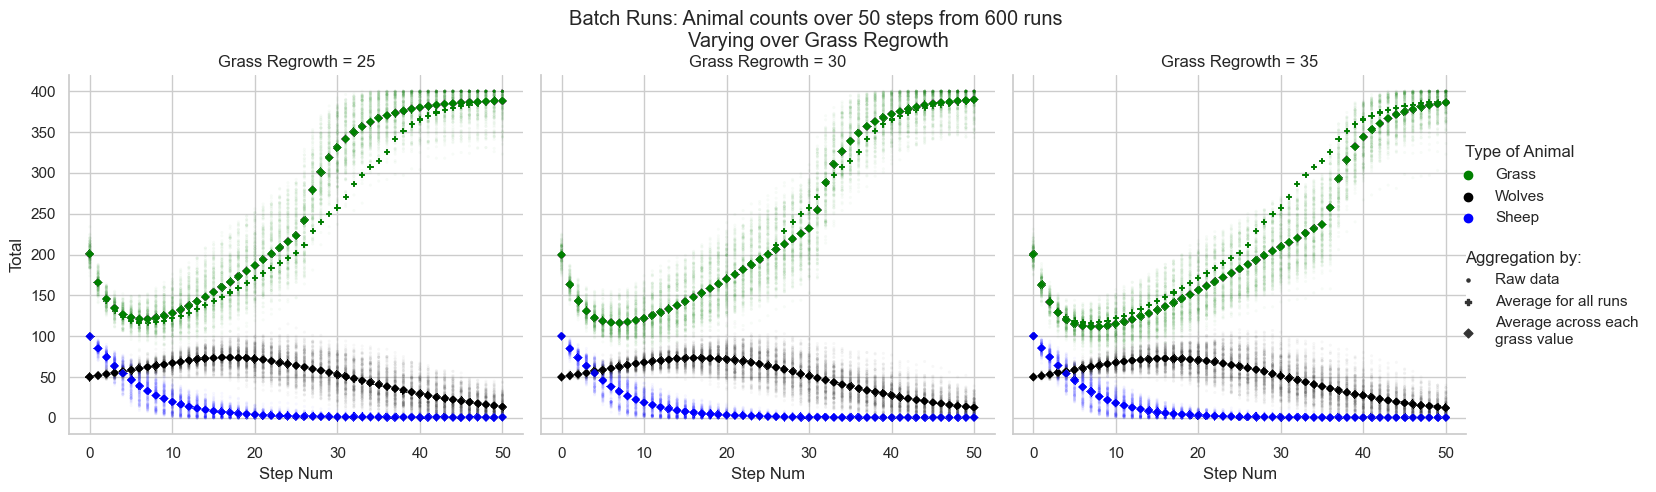

In [73]:
# Vary over Grass Regrowth
sns.set_theme(style="whitegrid")
subdata = batch_avgs_merged_long[batch_avgs_merged_long["Agg_Type"].isin(["Count","Total_Avg","Total_Avg_Grass"])]

## Here, we will do something similar to what we did above, but breaking it out by different components
# Look at previous plot but incorporate variables from runs (varying regrowth and gains)
facet_grass = sns.relplot(x="Step Num", y="Total", hue="Animal",  
                palette=["green", "black", "blue"], style= "Agg_Type", 
                size="Agg_Type", sizes={"Count": 5,"Total_Avg": 20,"Total_Avg_Grass": 20}, 
                hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Count": "o","Total_Avg": "P","Total_Avg_Grass": "D"}, 
                alpha = 0.03, col = "Grass Regrowth",
             data=subdata, kind = "scatter")

facet_grass.fig.subplots_adjust(top=0.85)

# if you want to do your own legend magic:
# suggest doing print(leg.get_texts() to see where things fall if you're not sure)
leg = facet_grass._legend
leg.get_texts()[0].set_text('Type of Animal')
leg.get_texts()[4].set_text('\nAggregation by:') #just wanted an extra line here
leg.get_texts()[5].set_text('Raw data')
leg.get_texts()[6].set_text('Average for all runs')
leg.get_texts()[7].set_text('Average across each \ngrass value')

#add overall title
facet_grass.fig.suptitle('Batch Runs: Animal counts over 50 steps from 600 runs \nVarying over Grass Regrowth')



Text(0.5, 0.98, 'Batch Runs: Animal counts over 50 steps from 600 runs \nVarying over Wolf Gain')

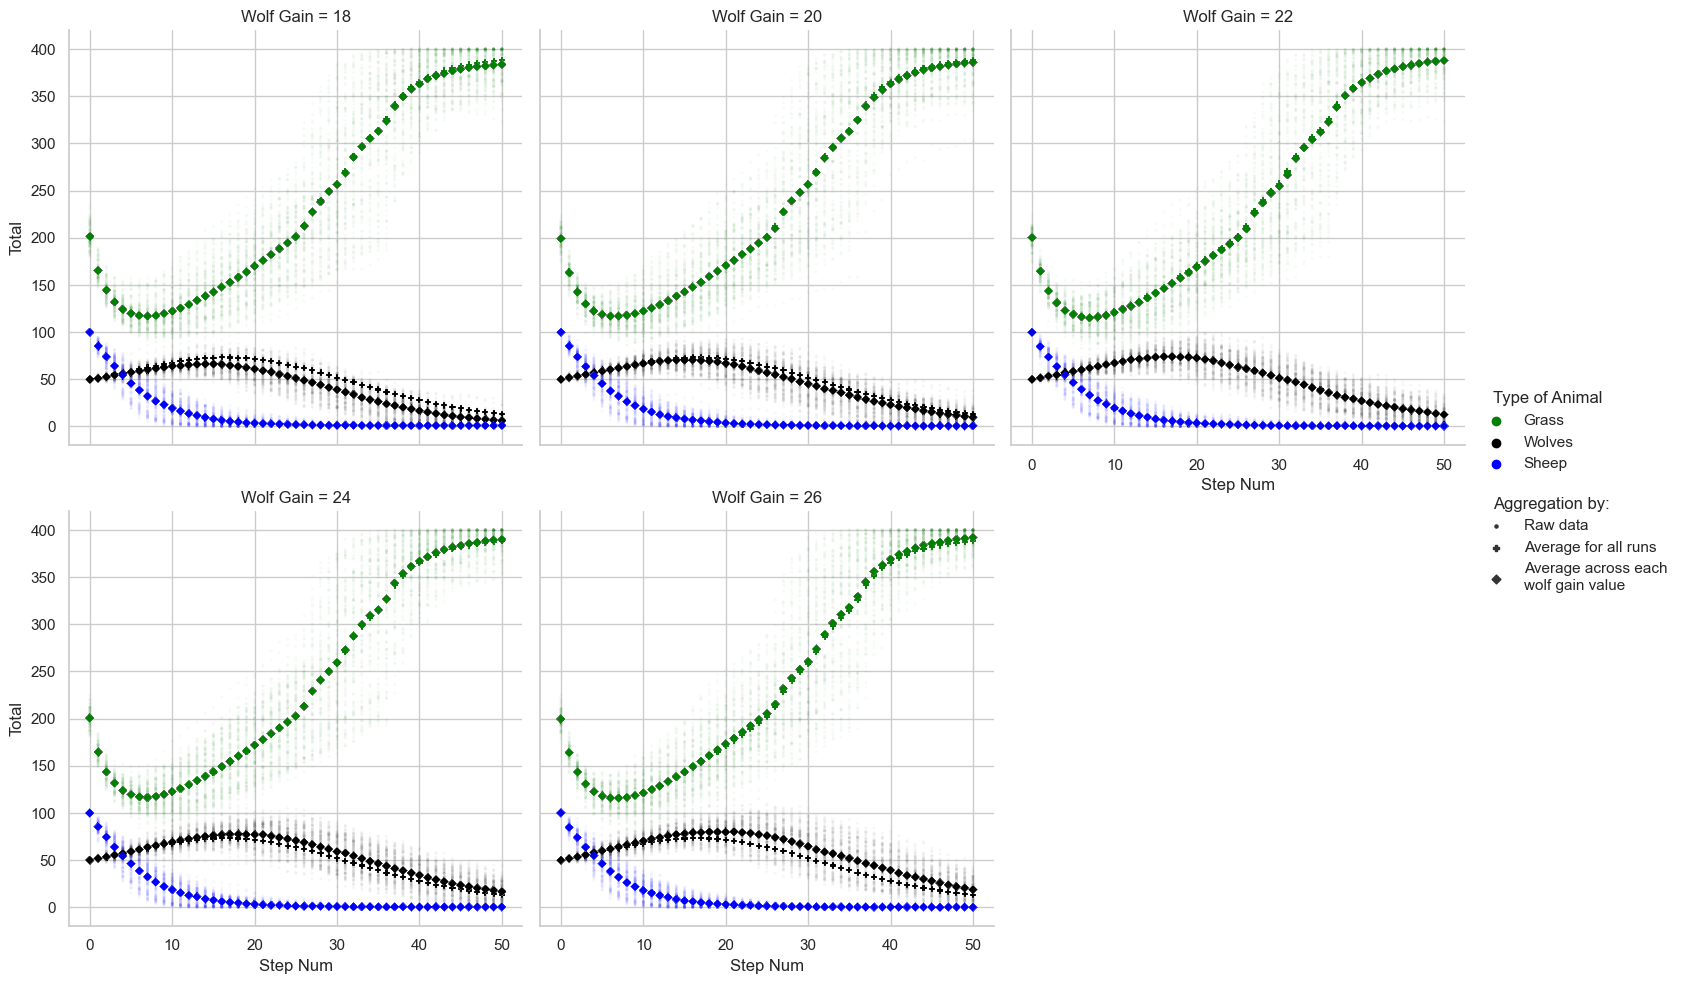

In [104]:
# Vary over Wolf Gains
sns.set_theme(style="whitegrid")
subdata = batch_avgs_merged_long[batch_avgs_merged_long["Agg_Type"].isin(["Count","Total_Avg","Total_Avg_Wolf_Gain"])]

## Here, we will do something similar to what we did above, but breaking it out by different components
# Look at previous plot but incorporate variables from runs (varying regrowth and gains)
# Use colwrap to make it easier to read
facet_wolf = sns.relplot(x="Step Num", y="Total", hue="Animal",  
                palette=["green", "black", "blue"], style= "Agg_Type", 
                size="Agg_Type", sizes={"Count": 5,"Total_Avg": 20,"Total_Avg_Wolf_Gain": 20}, 
                hue_order=["Grass", "Wolves", "Sheep"],
                markers = {"Count": "o","Total_Avg": "P","Total_Avg_Wolf_Gain": "D"}, 
                alpha = 0.03, col = "Wolf Gain", col_wrap = 3, 
             data=subdata, kind = "scatter")



# if you want to do your own legend magic:
# suggest doing print(leg.get_texts() to see where things fall if you're not sure)
leg = facet_wolf._legend
leg.get_texts()[0].set_text('Type of Animal')
leg.get_texts()[4].set_text('\nAggregation by:') #just wanted an extra line here
leg.get_texts()[5].set_text('Raw data')
leg.get_texts()[6].set_text('Average for all runs')
leg.get_texts()[7].set_text('Average across each \nwolf gain value')


facet_grass.fig.subplots_adjust(top=0.85)
#add overall title
facet_grass.fig.suptitle('Batch Runs: Animal counts over 50 steps from 600 runs \nVarying over Wolf Gain')



Text(0.5, 0.98, 'Boxplots by Animal \nNote: Y axis scale differs across plots')

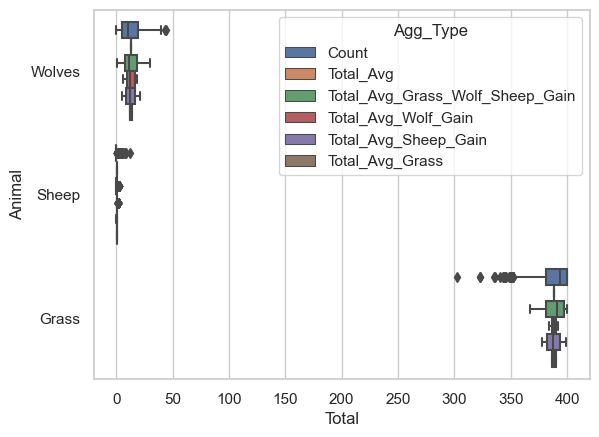

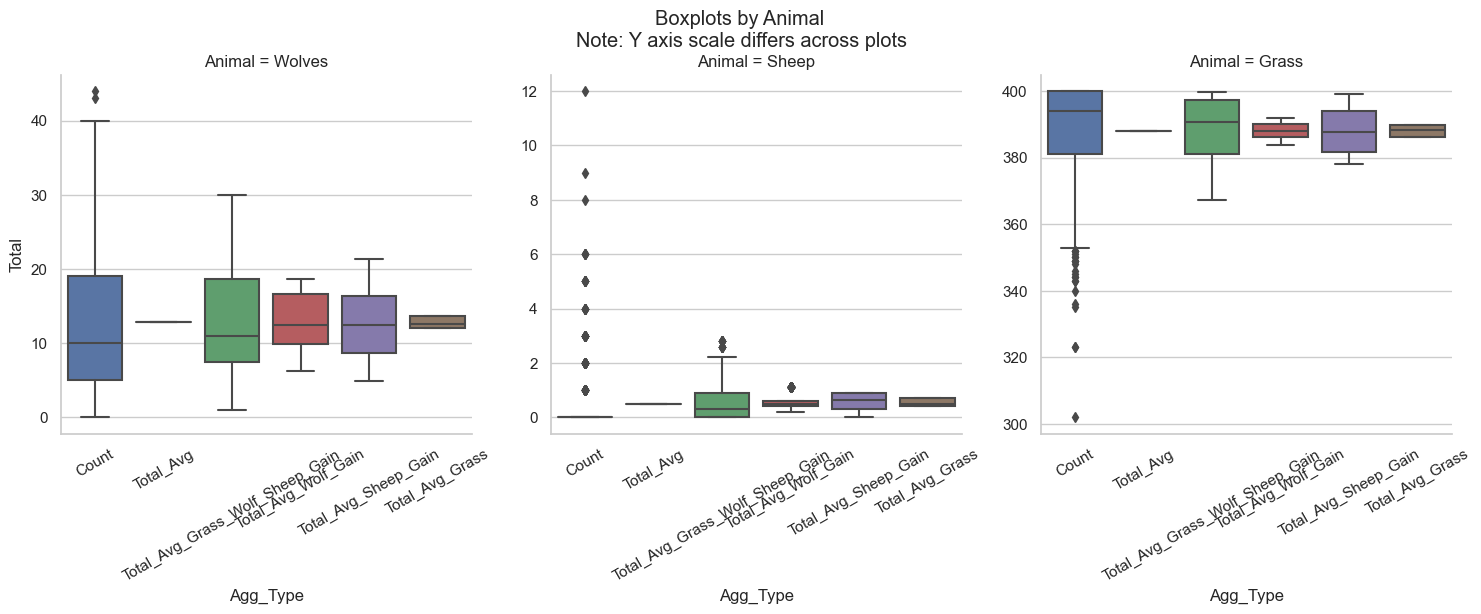

In [151]:
# Vary over Wolf Gains
sns.set_theme(style="whitegrid")

#can check the data to see how it looks
batch_avgs_merged_long[batch_avgs_merged_long["Step Num"]==50]

# This graph doesn't work here but could be useful for you (so, keeping the code)
sns.boxplot(data=batch_avgs_merged_long[batch_avgs_merged_long["Step Num"]==50], 
            x="Total", y="Animal", hue="Agg_Type")


#nicer looking plot for our purposes
#note: I would rename the labels to make them look cleaner
facet_box = sns.catplot(data=batch_avgs_merged_long[(batch_avgs_merged_long["Step Num"]==50)], 
            x="Agg_Type", y="Total", col="Animal", kind = "box", sharey = False).tick_params(axis='x', rotation=30)

facet_box.fig.subplots_adjust(top=0.85) # adjust the Figure in rp
facet_box.fig.suptitle('Boxplots by Animal \nNote: Y axis scale differs across plots')